In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import re

In [2]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios-BHRP.csv')
df_1 = df_1[(df_1['Ano'] == 2019)]
df_1.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Valor adicionado bruto da Indústria a preços correntes (R$ 1.000),Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000),"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)",Valor adicionado bruto total a preços correntes (R$ 1.000),"Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)",Produto Interno Bruto a preços correntes (R$ 1.000),Produto Interno Bruto per capita a preços correntes (R$ 1.000),Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
17,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"63,197","51,778","49,607","181,944","6,005","187,949","24,361.53",Indústrias extrativas,"Administração, defesa, educação e saúde públic...",Demais serviços
35,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,"11,537,468","9,924,629","2,212,077","23,687,150","4,379,098","28,066,248","63,882.75",Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...
53,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,"9,781","41,414","30,739","96,526","5,797","102,323","14,898.51",Demais serviços,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a..."
71,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,"1,041,129","982,042","255,486","2,300,665","215,568","2,516,233","62,744.25",Demais serviços,Indústrias extrativas,"Administração, defesa, educação e saúde públic..."
89,2019,3,Sudeste,31,MG,Minas Gerais,3109600,Cachoeira da Prata,NaN,3107,...,"2,273","18,942","19,154","41,662","5,085","46,748","12,974.72","Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [3]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [4]:
#Dataser IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [9]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,859,0,99,0,904,24,0.655,0.672,0.814,0.514
1,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,586,0,57,3,637,4,0.749,0.709,0.864,0.687
2,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,1650,0,413,29,1507,30,0.637,0.669,0.834,0.464
3,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,1025,1,191,23,949,31,0.747,0.761,0.857,0.639
4,2019,3,Sudeste,31,MG,Minas Gerais,3114907,Casa Grande,NaN,3107,...,776,0,117,30,692,5,0.652,0.608,0.823,0.555


In [36]:
df.head()

,Nome da cidade,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,466,2,741,9,1,3,0,436,0,247,0,0,0,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [56]:
#

t = []
for i in df:
    x = []
    for j in df[i]:
        x.append(j)
    t.append(x)

aux = t[1:]
aux

[[3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 ['Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste'],
 [31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  

In [7]:
#Tratamento dos dados categóricos do PIB do municipio

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
regiao_metropolitana = le.fit(df_1['Região Metropolitana'])
regiao_metropolitana = le.transform(df_1['Região Metropolitana'])
#print(regiao_metropolitana)

le = preprocessing.LabelEncoder()
hierarquia_urbana = le.fit(df_1['Hierarquia Urbana (principais categorias)'])
hierarquia_urbana = le.transform(df_1['Hierarquia Urbana (principais categorias)'])
#print(hierarquia_urbana)

le = preprocessing.LabelEncoder()
mesorregiao = le.fit(df_1['Nome da Mesorregião'])
mesorregiao = le.transform(df_1['Nome da Mesorregião'])
#print(mesorregiao)

le = preprocessing.LabelEncoder()
microrregiao = le.fit(df_1['Nome da Microrregião'])
microrregiao = le.transform(df_1['Nome da Microrregião'])
#print(microrregiao)

le = preprocessing.LabelEncoder()
regiao_geografica_imediata = le.fit(df_1['Nome da Região Geográfica Imediata'])
regiao_geografica_imediata = le.transform(df_1['Nome da Região Geográfica Imediata'])
#print(regiao_geografica_imediata)

le = preprocessing.LabelEncoder()
regiao_geografica_intermediaria = le.fit(df_1['Nome da Região Geográfica Intermediária'])
regiao_geografica_intermediaria = le.transform(df_1['Nome da Região Geográfica Intermediária'])
#print(regiao_geografica_intermediaria)

le = preprocessing.LabelEncoder()
concentracao_urbana = le.fit(df_1['Nome Concentração Urbana'])
concentracao_urbana = le.transform(df_1['Nome Concentração Urbana'])
#print(concentracao_urbana)

le = preprocessing.LabelEncoder()
tipo_concentracao_urbana = le.fit(df_1['Tipo Concentração Urbana'])
tipo_concentracao_urbana = le.transform(df_1['Tipo Concentração Urbana'])
#print(tipo_concentracao_urbana)

le = preprocessing.LabelEncoder()
arranjo_populacional = le.fit(df_1['Nome Arranjo Populacional'])
arranjo_populacional = le.transform(df_1['Nome Arranjo Populacional'])
#print(arranjo_populacional)

le = preprocessing.LabelEncoder()
regiao_rural = le.fit(df_1['Nome da Região Rural'])
regiao_rural = le.transform(df_1['Nome da Região Rural'])
#print(regiao_rural)

le = preprocessing.LabelEncoder()
regiao_rural_nucleo = le.fit(df_1['Região rural (segundo classificação do núcleo)'])
regiao_rural_nucleo = le.transform(df_1['Região rural (segundo classificação do núcleo)'])
#print(regiao_rural_nucleo)

le = preprocessing.LabelEncoder()
nome_municipio = le.fit(df_1['Nome do Município'])
nome_municipio = le.transform(df_1['Nome do Município'])
#print(nome_municipio)


In [8]:
#Tratamento dos dados numéricos do PIB do municipio

#Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)
agropecuaria = df_1['Valor adicionado bruto da Agropecuária a preços correntes(R$ 1.000)']
industria = df_1['Valor adicionado bruto da Indústria a preços correntes (R$ 1.000)']
servicos = df_1['Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)']

administracao = df_1['Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)']
bruto_total = df_1['Valor adicionado bruto total a preços correntes (R$ 1.000)']
impostos = df_1['Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)']
precos_correntes = df_1['Produto Interno Bruto a preços correntes (R$ 1.000)']
#per_capita = df_1['Produto Interno Bruto per capita a preços correntes (R$ 1.000)']

agropecuaria_f = []
industria_f = []
servicos_f = []
administracao_f = []
bruto_total_f = []
impostos_f = []
precos_correntes_f = []
#per_capita_f = []

for i in agropecuaria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    agropecuaria_f.append(float(i))

for i in industria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    industria_f.append(float(i))

for i in servicos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    servicos_f.append(float(i))

for i in administracao:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    administracao_f.append(float(i))

for i in bruto_total:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    bruto_total_f.append(float(i))

for i in impostos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    impostos_f.append(float(i))

for i in precos_correntes:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços em branco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    precos_correntes_f.append(float(i))

'''
for i in per_capita:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    per_capita_f.append(float(i))
'''



"\nfor i in per_capita:\n    #Expressão regex que remove a segunda vírgula\n    i = re.sub('(,[^,]*),', r'\x01', i)\n    #Remove os espaços embranco e troca o ponto por vírgula\n    i = i.replace(' ','').replace(',', '.')\n    per_capita_f.append(float(i))\n"

In [9]:
#Tratamento dos dados numéricos do IDH dos Municipios

idh = df_3['IDH 2010']
idh_renda = df_3['IDHM Renda 2010']
idh_longevidade = df_3['IDHM Longevidade 2010']
idh_educacao = df_3['IDHM Educação 2010']

idh_f = []
idh_renda_f = []
idh_longevidade_f = []
idh_educacao_f = []

for i in idh:
    idh_f.append(float(i))

for i in idh_renda:
    idh_renda_f.append(float(i))

for i in idh_longevidade:
    idh_longevidade_f.append(float(i))
    
for i in idh_educacao:
    idh_educacao_f.append(float(i))


In [10]:
#Tratamento dos dados númericos do CAR

app = df_2['APP']
superior_1800 = df_2['Altitude Superior 1800']
consolidade = df_2['Consolidada']
declividade_maior_45 = df_2['Declividade Maior 45']
imoveis = df_2['Imoveis']
pousio = df_2['Pousio']
topo_morro = df_2['Topo de Morro']
banhado = df_2['Banhado']
borda_chapada = df_2['Borda Chapada']
hidrografia = df_2['Hidrografia']
manguezal = df_2['Manguezal']
nascentes = df_2['Nascentes']
reserva_legal = df_2['Reserva Legal']
restinga = df_2['Restinga']
servidao_administrativa = df_2['Servidão Administrativa']
restrito = df_2['Restrito']
vegetacao_nativa = df_2['Vegetação Nativa']
vereda = df_2['Vereda']
                           
app_f = []
superior_1800_f = []
consolidade_f = []
declividade_maior_45_f = []
imoveis_f = []
pousio_f = []
topo_morro_f = []
banhado_f = []
borda_chapada_f = []
hidrografia_f = []
manguezal_f = []
nascentes_f = []
reserva_legal_f = []
restinga_f = []
servidao_administrativa_f = []
restrito_f = []
vegetacao_nativa_f = []
vereda_f = []
                           
for i in app:
    app_f.append(float(i))

for i in superior_1800:
    superior_1800_f.append(float(i))
                           
for i in consolidade:
    consolidade_f.append(float(i))
                           
for i in declividade_maior_45:
    declividade_maior_45_f.append(float(i))
                           
for i in imoveis:
    imoveis_f.append(float(i))
                           
for i in pousio:
    pousio_f.append(float(i))
                           
for i in topo_morro:
    topo_morro_f.append(float(i))
                           
for i in banhado:
    banhado_f.append(float(i))
                           
for i in borda_chapada:
    borda_chapada_f.append(float(i))
                           
for i in hidrografia:
    hidrografia_f.append(float(i))
                           
for i in manguezal:
    manguezal_f.append(float(i))
                           
for i in nascentes:
    nascentes_f.append(float(i))
                           
for i in reserva_legal:
    reserva_legal_f.append(float(i))
                           
for i in restinga:
    restinga_f.append(float(i))
                           
for i in servidao_administrativa:
   servidao_administrativa_f.append(float(i))
                           
for i in restrito:
    restrito_f.append(float(i))
                           
for i in vegetacao_nativa:
    vegetacao_nativa_f.append(float(i))
                           
for i in vereda:
    vereda_f.append(float(i))

In [11]:
#aux = dimensão > 2
aux = []

for i in range(len(regiao_metropolitana)):
    t = []
    #PIB dos municipios
    t.append(nome_municipio[i])
    t.append(regiao_metropolitana[i])
    t.append(hierarquia_urbana[i])
    t.append(mesorregiao[i])
    t.append(microrregiao[i])
    t.append(regiao_geografica_imediata[i])
    t.append(regiao_geografica_intermediaria[i])
    t.append(concentracao_urbana[i])
    t.append(tipo_concentracao_urbana[i])
    t.append(arranjo_populacional[i])
    t.append(regiao_rural[i])
    t.append(regiao_rural_nucleo[i])
    t.append(agropecuaria_f[i])
    t.append(industria_f[i])
    t.append(servicos_f[i])
    t.append(administracao_f[i])
    t.append(bruto_total_f[i])
    t.append(impostos_f[i])
    t.append(precos_correntes_f[i])
    #CAR
    t.append(app_f [i])
    t.append(superior_1800_f[i])
    t.append(consolidade_f[i])
    t.append(declividade_maior_45_f[i])
    t.append(imoveis_f[i])
    t.append(pousio_f[i])
    t.append(topo_morro_f[i])
    t.append(banhado_f[i])
    t.append(borda_chapada_f[i])
    t.append(hidrografia_f[i])
    t.append(manguezal_f[i])
    t.append(nascentes_f[i])
    t.append(reserva_legal_f[i])
    t.append(restinga[i])
    t.append(servidao_administrativa_f[i])
    t.append(restrito_f[i])
    t.append(vegetacao_nativa[i])
    t.append(vereda[i])                        
    #IDH
    t.append(idh_f[i])
    t.append(idh_renda_f[i])
    t.append(idh_longevidade_f[i])
    t.append(idh_educacao_f[i])
    
    aux.append(t)


C:\Users\T.i\anaconda3-2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 556080639.3785539
2 210192169.15856335
3 115506964.10906158
4 80521862.51621798
5 60820081.80292121
6 38858571.16080958
7 35412057.12549676
8 30277222.377658006
9 27430155.515820812
10 28301029.38361772


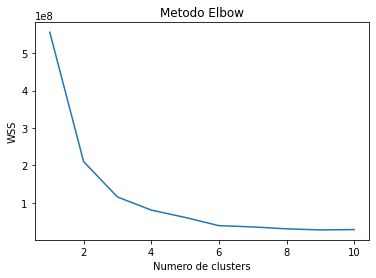

In [12]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [13]:
#Silhouette Score
#Valor varia entre -1 e +1
#1: Clusters bem mais separados e com valores melhor definidos
#0: Distância entre os clusters formados não é significativa
#-1: Valores dos clusters errados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores_silhouette_scores = []

for i in range(2,15):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit_predict(aux)
    score = silhouette_score(aux, km.labels_, metric='euclidean')
    
    x = []
    x.append(i)
    x.append(score)
    valores_silhouette_scores.append(x)

print(valores_silhouette_scores)

#Melhor valor encontrado = 4



[[2, 0.5572728373694774], [3, 0.5016551033724882], [4, 0.49867537870769074], [5, 0.4313086106651957], [6, 0.41112782081951965], [7, 0.4064731276836886], [8, 0.34272335399369913], [9, 0.346868057604085], [10, 0.31471454229151713], [11, 0.32036268445182253], [12, 0.2931916451535427], [13, 0.3226765060921619], [14, 0.3404258163949024]]


In [14]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[ 6.59053673e+02  8.30257198e+01]
 [-1.32799946e+03  4.51148140e+00]
 [ 2.77642936e+03  1.08813829e+03]
 [ 3.47162210e+03 -9.69766708e+02]
 [-3.90994198e+03 -2.13525082e+02]
 [-3.61843848e+03  3.08461677e+01]
 [-3.37676936e+02 -1.15258658e+02]
 [-1.34583361e+03 -4.79411019e+02]
 [ 1.62104410e+03 -1.43439754e+01]
 [-3.45647545e+03  1.73609141e+02]
 [-1.44712516e+03 -4.16318764e+02]
 [ 1.02776876e+03  3.56044459e+02]
 [ 4.99976478e+03  4.64419790e+02]
 [ 4.66496572e+03  6.39383199e+01]
 [ 6.59938069e+03 -6.10341079e+02]
 [ 4.84518353e+03  5.13546458e+02]
 [ 1.13062744e+02  2.88427551e+02]
 [-1.70145945e+03  6.81778152e+01]
 [-3.02219019e+03 -1.52170051e+02]
 [-3.99192519e+03 -4.28819609e+02]
 [-3.06743393e+03  3.50438106e+01]
 [-2.66002643e+03 -1.39666023e+02]
 [ 6.73492898e+01  2.77215922e+02]
 [ 2.26362257e+03  1.51578978e+03]
 [ 6.91893491e+02 -3.42459351e+01]
 [ 1.20210913e+03 -2.35195929e+02]
 [-3.70338510e+03 -3.26449276e+02]
 [ 3.69747988e+03  5.57591294e+02]
 [-2.59863060e+03 -9

In [15]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(aux)

print(cluster)


[1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 1]


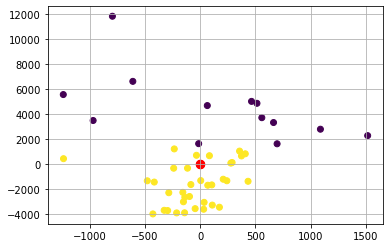

In [16]:
import matplotlib.pyplot as plt

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c='red') #posicao do centroide do agrupamento
plt.show()

In [17]:
#Pegando os centroides de cada cluster
centroids = kmeans.cluster_centers_
print(len(centroids))

2


In [18]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({1: 35, 0: 13})


In [19]:
#Mostrar o nome das cidades por cluster

cidades = [] #Armazena todos os ids das cidades contidos em aux
city = [] #Converte o id da cidade para o nome real da cidade
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
c4 = [] #Representa o cluster 4
c5 = [] #Representa o cluster 5
c6 = [] #Representa o cluster 6

j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

#Para cada id que representa uma cidade, eu adiciona no vetor "cidades"
for i in range(len(aux)):
    cidades.append(aux[i][0])

#Converto o id da cidade para o nome da cidade
city = le.inverse_transform(cidades)

#Para cada valor i do "cluster", tem-se o nome da cidade i
#Com isso, é feito um map do nome da cidade com cluster que ela pertence
for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    elif i == 4:
        c4.append(city[j])
    elif i == 5:
        c5.append(city[j])
    elif i == 6:
        c6.append(city[j])
    j = j + 1
    
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)



['Bonfim', 'Brumadinho', 'Conselheiro Lafaiete', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Itaúna', 'Lagoa Dourada', 'Ouro Preto', 'Pará de Minas', 'Pompéu', 'Resende Costa']
['Belo Vale', 'Betim', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Contagem', 'Cristiano Otoni', 'Crucilândia', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Ibirité', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaverava', 'Jeceaba', 'Juatuba', 'Maravilhas', 'Mário Campos', 'Mateus Leme', 'Moeda', 'Ouro Branco', 'Papagaios', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Queluzito', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo', 'Sete Lagoas']
[]
[]
[]
[]
[]
